In [1]:
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
from PIL import Image, ImageOps 
import matplotlib.image

# Importing the dataframe

In [2]:
#reading the csv
df = pd.read_csv("C:/Users/Qnouro/Desktop/Programming/Scrapper/leavesDatabase/leaf.csv", 
                  names = ["image array", "type 1", "type2"])

In [3]:
df.head()

,image array,type 1,type2
0,[[[132 124 113]\r\n [132 124 113]\r\n [133 1...,salicaceae,salix
1,[[[177 168 159]\r\n [182 173 164]\r\n [184 1...,tiliaceae,heliocarpus
2,[[[255 255 255]\r\n [255 255 255]\r\n [255 2...,alangiaceae,alangium
3,[[[176 169 161]\r\n [180 173 165]\r\n [181 1...,tiliaceae,grewia
4,[[[152 142 130]\r\n [152 142 130]\r\n [152 1...,rubiaceae,hymenopogon


In [4]:
df = df.drop("image array", axis=1)
df = df.drop("type2", axis=1)
df.head(10)

,type 1
0,salicaceae
1,tiliaceae
2,alangiaceae
3,tiliaceae
4,rubiaceae
5,salicaceae
6,leguminosae
7,fagaceae
8,NaN
9,annonaceae


In [10]:
img_path = "C:/Users/Qnouro/Desktop/Programming/Scrapper/leavesSegmented/"

end_path = ".jpg"

img_array = []


for i in range(4770):
    try:
        read_img = cv2.imread(img_path +str(i)+ end_path)
        #resizing
        size = (200, 200)
        fit_and_resized_image = cv2.resize(read_img, dsize=size, interpolation=cv2.INTER_CUBIC)
        img_array.append(fit_and_resized_image)
    except:
        img_array.append(None)

# Image visualisation

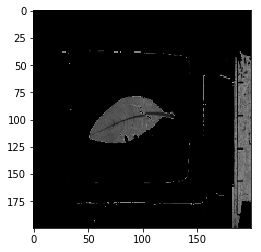

In [11]:
imgplot = plt.imshow(img_array[5])

In [12]:
df_copy = df.copy()

df_copy['img'] = img_array

In [13]:
df_copy.head()

,type 1,img
0,salicaceae,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
1,tiliaceae,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
2,alangiaceae,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
3,tiliaceae,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
4,rubiaceae,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."


# Dropping NaNs

In [14]:
df_copy.dropna(inplace=True)

In [15]:
df_copy.head()

,type 1,img
0,salicaceae,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
1,tiliaceae,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
2,alangiaceae,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
3,tiliaceae,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
4,rubiaceae,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."


In [16]:
len(df.index.values)

4770

In [17]:
myvalues = df_copy["type 1"].values

for index, row in df_copy.iterrows():
    row["type 1"] = row["type 1"].rstrip()

df_copy.head(10)

,type 1,img
0,salicaceae,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
1,tiliaceae,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
2,alangiaceae,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
3,tiliaceae,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
4,rubiaceae,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
5,salicaceae,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
6,leguminosae,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
7,fagaceae,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
9,annonaceae,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
10,sapindaceae,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."


In [18]:
first_type_array = pd.Series(df_copy['type 1']).unique()

In [19]:
nb = df_copy.loc[df_copy["type 1"] == (first_type_array)[0]]

In [20]:
len_array = []
for item in first_type_array:
    len_array.append(len(df_copy.loc[df_copy["type 1"] == item]))
len(len_array)

36

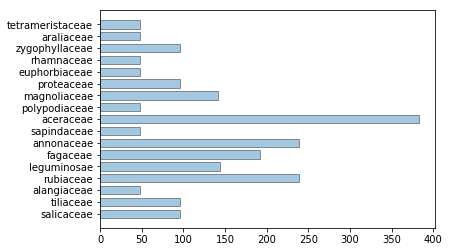

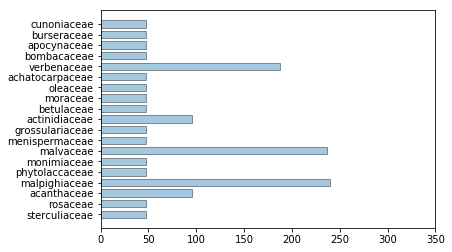

In [21]:
plt.barh([i for i in range(17)], len_array[:17], tick_label = first_type_array[:17], edgecolor="black", height=0.7, align='center', alpha=0.4)
plt.show()

plt.barh([i for i in range(17,len(len_array))], len_array[17:], tick_label = first_type_array[17:], edgecolor="black", height=0.7, align='center', alpha=0.4)
plt.xlim([0,350])
plt.show()

# balancing the dataset

In [22]:
df_copy_2 = df_copy.groupby('type 1')
df_copy_2 = df_copy_2.apply(lambda x: x.sample(df_copy_2.size().min())).reset_index(drop=True)

In [23]:
df_copy_2.head()

,type 1,img
0,acanthaceae,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
1,acanthaceae,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
2,acanthaceae,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
3,acanthaceae,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
4,acanthaceae,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."


In [24]:
len_array = []
for item in first_type_array:
    len_array.append(df_copy_2["type 1"].value_counts())

len_array = df_copy_2["type 1"].value_counts()

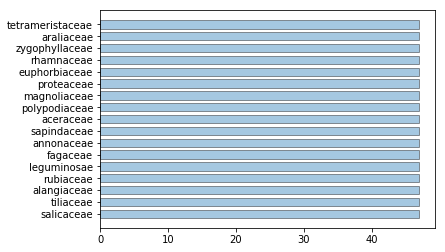

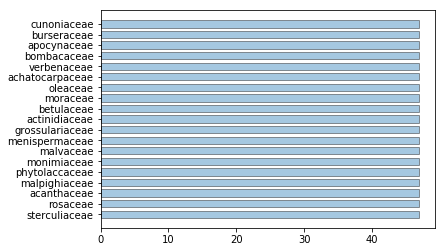

In [25]:
plt.barh([i for i in range(17)], len_array[:17], tick_label = first_type_array[:17], edgecolor="black", height=0.7, align='center', alpha=0.4)
plt.show()

plt.barh([i for i in range(17,len(len_array))], len_array[17:], tick_label = first_type_array[17:], edgecolor="black", height=0.7, align='center', alpha=0.4)
plt.show()

# Encoding

In [26]:
#One Hot Encoding
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

data = df_copy_2['type 1']

values = np.array(data)
# integer encode
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values)
# binary encode
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
# invert first example
inverted = label_encoder.inverse_transform([np.argmax(onehot_encoded[0, :])])
inverted = label_encoder.inverse_transform([32])


c:\users\qnouro\appdata\local\programs\python\python36\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [27]:
data = df_copy_2
data = pd.get_dummies(data, columns = ['type 1'])


In [28]:
data.head()

,img,type 1_acanthaceae,type 1_aceraceae,type 1_achatocarpaceae,type 1_actinidiaceae,type 1_alangiaceae,type 1_annonaceae,type 1_apocynaceae,type 1_araliaceae,type 1_betulaceae,...,type 1_rhamnaceae,type 1_rosaceae,type 1_rubiaceae,type 1_salicaceae,type 1_sapindaceae,type 1_sterculiaceae,type 1_tetrameristaceae,type 1_tiliaceae,type 1_verbenaceae,type 1_zygophyllaceae
0,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Shuffling

In [29]:
preprocessed_df = data.sample(frac=1)

In [30]:
preprocessed_df.head(5)

,img,type 1_acanthaceae,type 1_aceraceae,type 1_achatocarpaceae,type 1_actinidiaceae,type 1_alangiaceae,type 1_annonaceae,type 1_apocynaceae,type 1_araliaceae,type 1_betulaceae,...,type 1_rhamnaceae,type 1_rosaceae,type 1_rubiaceae,type 1_salicaceae,type 1_sapindaceae,type 1_sterculiaceae,type 1_tetrameristaceae,type 1_tiliaceae,type 1_verbenaceae,type 1_zygophyllaceae
904,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
974,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1159,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1113,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
330,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


# Saving the data

In [31]:
preprocessed_df.to_pickle("preprocessedLeafDB.pkl")

In [32]:
read_df = pd.read_pickle("preprocessedLeafDB.pkl")

In [33]:
read_df.head(5)

,img,type 1_acanthaceae,type 1_aceraceae,type 1_achatocarpaceae,type 1_actinidiaceae,type 1_alangiaceae,type 1_annonaceae,type 1_apocynaceae,type 1_araliaceae,type 1_betulaceae,...,type 1_rhamnaceae,type 1_rosaceae,type 1_rubiaceae,type 1_salicaceae,type 1_sapindaceae,type 1_sterculiaceae,type 1_tetrameristaceae,type 1_tiliaceae,type 1_verbenaceae,type 1_zygophyllaceae
904,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
974,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1159,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1113,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
330,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


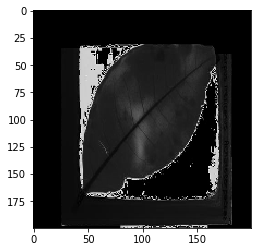

In [34]:
plt.imshow(read_df["img"][130])